In [1]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# 1. 数据预处理

In [2]:
testdf = pd.read_csv("YT_Videos_Comments.csv")
testdf.head()
testdf.columns

C:\Users\86139\AppData\Local\Temp\ipykernel_19568\610759299.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  testdf = pd.read_csv("YT_Videos_Comments.csv")


Index(['User', 'Video Title', 'Video Description', 'Video ID',
       'Comment (Displayed)', 'Comment (Actual)', 'Comment Author',
       'Comment Author Channel ID', 'Comment Time'],
      dtype='object')

## 1.1 选择Comment和Comment Author作为特征构建的主要内容
我的想法：对评论分词，然后对CommentAuthor计数，就这样

### 去缺失值

In [3]:
print(testdf.isnull().sum())

testdf = testdf.dropna(subset=['Comment (Actual)'])
testdf = testdf.dropna(subset=['Comment Author'])
testdf = testdf.loc[:,['User', 'Video Title', 'Comment (Actual)', 'Comment Author']]
testdf.head()

User                              0
Video Title                     149
Video Description            196767
Video ID                     429330
Comment (Displayed)          467375
Comment (Actual)             482881
Comment Author               482909
Comment Author Channel ID    482868
Comment Time                 482862
dtype: int64


,User,Video Title,Comment (Actual),Comment Author
0,Cleo Abram,"Robots made of spiders (yes, really)",zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo
1,Cleo Abram,"Robots made of spiders (yes, really)","This is way less cool than it seems, spiders a...",CMZ neu
2,Cleo Abram,"Robots made of spiders (yes, really)",Spiders see this and this is why they made the...,Kiana Marrie
3,Cleo Abram,"Robots made of spiders (yes, really)",you looks pretty 😍,Noob
4,Cleo Abram,"Robots made of spiders (yes, really)",I can hear the hairs standing up on my wife’s ...,chancellor9000


### 构建计数变量

In [4]:
# 构建CommentAuthor计数向量 统计评论者在全部的视频下评论了多少次
testdf['Comment Author Counts'] = testdf['Comment Author'].map(testdf['Comment Author'].value_counts())
print(testdf.shape)
print(testdf.isnull().sum())
testdf.head()

(379032, 5)
User                     0
Video Title              0
Comment (Actual)         0
Comment Author           0
Comment Author Counts    0
dtype: int64


,User,Video Title,Comment (Actual),Comment Author,Comment Author Counts
0,Cleo Abram,"Robots made of spiders (yes, really)",zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,1
1,Cleo Abram,"Robots made of spiders (yes, really)","This is way less cool than it seems, spiders a...",CMZ neu,2
2,Cleo Abram,"Robots made of spiders (yes, really)",Spiders see this and this is why they made the...,Kiana Marrie,1
3,Cleo Abram,"Robots made of spiders (yes, really)",you looks pretty 😍,Noob,6
4,Cleo Abram,"Robots made of spiders (yes, really)",I can hear the hairs standing up on my wife’s ...,chancellor9000,1


## 1.2 文本预处理，我照着gpt干的

In [9]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# 分词+去停用词函数，这边需要下载一个语料库
def text_segmentation(text):
    # Remove punctuation marks
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # Remove stopwords
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    
    # stemmer
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

testdf["Comment Seg"] = testdf["Comment (Actual)"].apply(text_segmentation)
testdf.head()

KeyboardInterrupt: 

## 1.3 保存
数据集位置 https://box.nju.edu.cn/d/2f4ead8c80504072a02a/

In [74]:
# testdf.to_csv("preProcessdata.csv", index=False)
import pandas as pd
df = pd.read_csv("preProcessdata.csv")
df.head()
# df存在缺失值，太无效啦
df[df["Comment Seg"].isnull()]
df = df.dropna(subset=['Comment Seg'])

添加编号

In [75]:
# 将行编号设置为索引
import numpy as np
df = df.set_index(np.arange(len(df)))
df = df.reset_index()
df

,index,User,Video Title,Comment (Actual),Comment Author,Comment Author Counts,Comment Seg
0,0,Cleo Abram,"Robots made of spiders (yes, really)",zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,1,zombi spider bomb damn lab late
1,1,Cleo Abram,"Robots made of spiders (yes, really)","This is way less cool than it seems, spiders a...",CMZ neu,2,way less cool seem spider actual muscl extens ...
2,2,Cleo Abram,"Robots made of spiders (yes, really)",Spiders see this and this is why they made the...,Kiana Marrie,1,spider see made terrifi go poke panic button
3,3,Cleo Abram,"Robots made of spiders (yes, really)",you looks pretty 😍,Noob,6,look pretti
4,4,Cleo Abram,"Robots made of spiders (yes, really)",I can hear the hairs standing up on my wife’s ...,chancellor9000,1,hear hair stand wife arm mile away
...,...,...,...,...,...,...,...
375614,375614,Physics Girl,5 AMAZING stars we’ve discovered in space!,"hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,5,hey girlmak vdo make lengthi realli help vid
375615,375615,Physics Girl,5 AMAZING stars we’ve discovered in space!,Third,Izzo Mapping,3,third
375616,375616,Physics Girl,5 AMAZING stars we’ve discovered in space!,third,Indecisive,5,third
375617,375617,Physics Girl,5 AMAZING stars we’ve discovered in space!,Second,Nathan,25,second


### 从这开始新加特征
#### 大写字母占总文字的比例

In [76]:
# 实现计算大写字母占总文字的比例
def countCapitalLetterRatio(text):
    lowerLetterList = [chr(i) for i in range(97,123)]
    capitalLetterList = [chr(i) for i in range(65,91)]
    lowerLetterNum = len([i for i in text if i in lowerLetterList])
    capitalLetterNum = len([i for i in text if i in capitalLetterList])
    if capitalLetterNum+lowerLetterNum==0:
        return 0
    return float("{:.3f}".format(capitalLetterNum/(capitalLetterNum+lowerLetterNum)))
df["CapitalLetterRatio"] = df["Comment (Actual)"].apply(countCapitalLetterRatio)
df.head()

,index,User,Video Title,Comment (Actual),Comment Author,Comment Author Counts,Comment Seg,CapitalLetterRatio
0,0,Cleo Abram,"Robots made of spiders (yes, really)",zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,1,zombi spider bomb damn lab late,0.000
1,1,Cleo Abram,"Robots made of spiders (yes, really)","This is way less cool than it seems, spiders a...",CMZ neu,2,way less cool seem spider actual muscl extens ...,0.003
2,2,Cleo Abram,"Robots made of spiders (yes, really)",Spiders see this and this is why they made the...,Kiana Marrie,1,spider see made terrifi go poke panic button,0.011
3,3,Cleo Abram,"Robots made of spiders (yes, really)",you looks pretty 😍,Noob,6,look pretti,0.000
4,4,Cleo Abram,"Robots made of spiders (yes, really)",I can hear the hairs standing up on my wife’s ...,chancellor9000,1,hear hair stand wife arm mile away,0.019


#### 情感分析

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# 创建分词器
sid = SentimentIntensityAnalyzer()
import numpy as np
import pandas as pd
df = pd.read_csv("finalData.csv")
#compound表示复杂程度,neu表示中性,neg表示负面情绪,pos表示正面情绪
def 情感分析(text):
    dic = sid.polarity_scores(text)
    return max(dic["pos"],dic["neu"])
# polarity 越小越接近中性
df["Polarity"] = df["Comment (Actual)"].apply(情感分析)
df.head()

,Unnamed: 0,index,User,Video Title,Comment (Actual),Comment Author,Comment Author Counts,Comment Seg,Polarity,Comment Length,Worth Word Ratio
0,0,0,Cleo Abram,"Robots made of spiders (yes, really)",zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,1,zombi spider bomb damn lab late,0.498,10,0.600
1,1,1,Cleo Abram,"Robots made of spiders (yes, really)","This is way less cool than it seems, spiders a...",CMZ neu,2,way less cool seem spider actual muscl extens ...,0.794,71,0.451
2,2,2,Cleo Abram,"Robots made of spiders (yes, really)",Spiders see this and this is why they made the...,Kiana Marrie,1,spider see made terrifi go poke panic button,0.688,22,0.318
3,3,3,Cleo Abram,"Robots made of spiders (yes, really)",you looks pretty 😍,Noob,6,look pretti,0.615,4,0.500
4,4,4,Cleo Abram,"Robots made of spiders (yes, really)",I can hear the hairs standing up on my wife’s ...,chancellor9000,1,hear hair stand wife arm mile away,1.000,17,0.471


#### 评论长度

In [28]:
import nltk
from nltk.tokenize import word_tokenize
# NN     noun, singular 'desk' 名词单数形式
# NNS    nounplural  'desks'  名词复数形式
# NNP    propernoun, singular     'Harrison' 专有名词
# NNPS  proper noun, plural 'Americans'  专有名词复数形式
# PDT    predeterminer      'all the kids'  前位限定词
# DT     determiner  限定词（置于名词前起限定作用，如 the、some、my 等）
# JJ     adjective    'big'  形容词
# JJR    adjective, comparative 'bigger' （形容词或副词的）比较级形式
# JJS    adjective, superlative 'biggest'  （形容词或副词的）最高级
targetList = ["NN","NNS","NNP","NNPS","PDT","DT","JJ","JJR","JJS"]
def countWord(text):
    s = word_tokenize(text)
    PartOfSpeech = nltk.pos_tag(s)
    slen = len([i for i,j in PartOfSpeech if j!='.']) # 最终结果
    wordWorthNum = len([i for i,j in PartOfSpeech if j in targetList])
    return slen
df["Comment Length"] = df["Comment (Actual)"].apply(countWord)
df.head()

,index,User,Video Title,Comment (Actual),Comment Author,Comment Author Counts,Comment Seg,Polarity,Comment Length
0,0,Cleo Abram,"Robots made of spiders (yes, really)",zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,1,zombi spider bomb damn lab late,0.498,10
1,1,Cleo Abram,"Robots made of spiders (yes, really)","This is way less cool than it seems, spiders a...",CMZ neu,2,way less cool seem spider actual muscl extens ...,0.851,71
2,2,Cleo Abram,"Robots made of spiders (yes, really)",Spiders see this and this is why they made the...,Kiana Marrie,1,spider see made terrifi go poke panic button,0.688,22
3,3,Cleo Abram,"Robots made of spiders (yes, really)",you looks pretty 😍,Noob,6,look pretti,1.000,4
4,4,Cleo Abram,"Robots made of spiders (yes, really)",I can hear the hairs standing up on my wife’s ...,chancellor9000,1,hear hair stand wife arm mile away,1.000,17


#### 词性占比

In [29]:
import nltk
from nltk.tokenize import word_tokenize
# NN     noun, singular 'desk' 名词单数形式
# NNS    nounplural  'desks'  名词复数形式
# NNP    propernoun, singular     'Harrison' 专有名词
# NNPS  proper noun, plural 'Americans'  专有名词复数形式
# PDT    predeterminer      'all the kids'  前位限定词
# DT     determiner  限定词（置于名词前起限定作用，如 the、some、my 等）
# JJ     adjective    'big'  形容词
# JJR    adjective, comparative 'bigger' （形容词或副词的）比较级形式
# JJS    adjective, superlative 'biggest'  （形容词或副词的）最高级
targetList = ["NN","NNS","NNP","NNPS","PDT","DT","JJ","JJR","JJS"]
def countWord(text):
    s = word_tokenize(text)
    PartOfSpeech = nltk.pos_tag(s)
    slen = len([i for i,j in PartOfSpeech if j!='.']) # 最终结果
    wordWorthNum = len([i for i,j in PartOfSpeech if j in targetList])
    return "{:.3f}".format(wordWorthNum/slen)
df["Worth Word Ratio"] = df["Comment (Actual)"].apply(countWord)
df.head()

,index,User,Video Title,Comment (Actual),Comment Author,Comment Author Counts,Comment Seg,Polarity,Comment Length,Worth Word Ratio
0,0,Cleo Abram,"Robots made of spiders (yes, really)",zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,1,zombi spider bomb damn lab late,0.498,10,0.600
1,1,Cleo Abram,"Robots made of spiders (yes, really)","This is way less cool than it seems, spiders a...",CMZ neu,2,way less cool seem spider actual muscl extens ...,0.851,71,0.451
2,2,Cleo Abram,"Robots made of spiders (yes, really)",Spiders see this and this is why they made the...,Kiana Marrie,1,spider see made terrifi go poke panic button,0.688,22,0.318
3,3,Cleo Abram,"Robots made of spiders (yes, really)",you looks pretty 😍,Noob,6,look pretti,1.000,4,0.500
4,4,Cleo Abram,"Robots made of spiders (yes, really)",I can hear the hairs standing up on my wife’s ...,chancellor9000,1,hear hair stand wife arm mile away,1.000,17,0.471


In [ ]:
df.to_csv("finalData.csv")

选择测试集

In [15]:
testdf = df.sample(n=100)
testdf
testdf.to_csv("testData.csv", index=False)

,index,User,Video Title,Comment (Actual),Comment Author,Comment Author Counts,Comment Seg
316952,316952,Physics Girl,Can you power a house with a ShakeWeight?,"Well first, the USA should stop using coal pla...",MrAlucardDante,3,well first usa stop use coal plant worst plane...
178911,178911,Physics Girl,A small change I made to help UnFck the planet...,Too little \n Way \nToo late,Velvet Aeon,1,littl way late
315587,315587,Physics Girl,What is the MAGIC RUSSIAN DIAMOND?,i found a rock that looks like a giant peanut ...,remalemadingdong,2,found rock look like giant peanut yeah pretti ...
14973,14973,Cleo Abram,Space doesn't look like that,Finally my hope for youtube shorts restored,Naty Wubet,2,final hope youtub short restor
373478,373478,Physics Girl,Gravitational Waves Discovered for the First T...,so gravity isn't a field but the curvature of ...,/,2,graviti isnt field curvatur field spacetim field
...,...,...,...,...,...,...,...
351162,351162,Physics Girl,Can you solve the burning stick riddle? ft Sim...,so the sticks burn at different rates so you c...,Dean Smith,8,stick burn differ rate determin distanc end lo...
146382,146382,Physics Girl,It missed us by 9 days,"Do you know Ben, from Suspicious Observer!",Jude Roberts,1,know ben suspici observ
171925,171925,Physics Girl,What Schrödinger’s cat REALLY means,Feels like quantum woo in this video tbh,EmperorXenu,1,feel like quantum woo video tbh
214773,214773,Physics Girl,Electric Charge and Light - Physics 101 / AP P...,So have they tried to smash electrons to see i...,Christine LaBeach,26,tri smash electron see sub electron pop guess ...


选择训练集

In [16]:
traindf = df.drop(index=testdf.index)
traindf
traindf.to_csv("trainData.csv", index=False)

,index,User,Video Title,Comment (Actual),Comment Author,Comment Author Counts,Comment Seg
0,0,Cleo Abram,"Robots made of spiders (yes, really)",zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,1,zombi spider bomb damn lab late
1,1,Cleo Abram,"Robots made of spiders (yes, really)","This is way less cool than it seems, spiders a...",CMZ neu,2,way less cool seem spider actual muscl extens ...
2,2,Cleo Abram,"Robots made of spiders (yes, really)",Spiders see this and this is why they made the...,Kiana Marrie,1,spider see made terrifi go poke panic button
3,3,Cleo Abram,"Robots made of spiders (yes, really)",you looks pretty 😍,Noob,6,look pretti
4,4,Cleo Abram,"Robots made of spiders (yes, really)",I can hear the hairs standing up on my wife’s ...,chancellor9000,1,hear hair stand wife arm mile away
...,...,...,...,...,...,...,...
375614,375614,Physics Girl,5 AMAZING stars we’ve discovered in space!,"hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,5,hey girlmak vdo make lengthi realli help vid
375615,375615,Physics Girl,5 AMAZING stars we’ve discovered in space!,Third,Izzo Mapping,3,third
375616,375616,Physics Girl,5 AMAZING stars we’ve discovered in space!,third,Indecisive,5,third
375617,375617,Physics Girl,5 AMAZING stars we’ve discovered in space!,Second,Nathan,25,second


# 2. Bert生成语句向量

第二种方法使用BERT模型生成向量的原理是基于pooling操作，即对BERT模型最后一层输出执行池化操作得到文本的向量表示。

具体地说，在BERT模型中，每个输入序列（例如单个句子或多个句子）都被编码为一个固定长度的向量序列。对于每个位置i，BERT模型会输出一个大小为hidden_size的向量hi，其中hidden_size是预训练模型的隐藏状态大小。

因此，我们可以将BERT模型的输出视为一个形状为(batch_size, seq_len, hidden_size)的张量，其中batch_size是批次大小，seq_len是最大序列长度，hidden_size是模型的隐藏状态大小。

在第二种方法中，为了将整个输入文本表示为单个向量，可以通过在最后一层隐藏状态上执行平均池化（mean pooling）或最大池化（max pooling）等操作来组合所有单词向量。常用的是平均池化，即将所有单词向量的值相加并除以总数，得到一个平均向量作为文本的向量表示。这样得到的向量就可以代表输入文本，并输入到下游任务中进行分类、聚类等操作。

需要注意的是，由于BERT模型对于长序列的处理能力较强，因此在使用第二种方法时，可以选择保留较长的序列，以充分利用BERT模型的能力。同时，还需要根据具体情况选择合适的池化方式和向量维度大小。

In [21]:
from transformers import BertTokenizer, BertModel
import torch
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [24]:
text_column = df['Comment Seg']
vectors = []
for text in text_column:
    tokens = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True)
    input_ids = torch.tensor([tokens])
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs[0]
        pooled = torch.mean(embeddings, dim=1)
    vectors.append(pooled.numpy())

vectors = np.vstack(vectors)


In [26]:
np.savetxt("bertlabel.csv", vectors, delimiter=',')

In [41]:
print(vectors.sum(axis = 1))

[ -8.020923   -6.7533965  -7.904389  ...  -9.919479  -10.721624
  -9.014546 ]


## 2.2 PCA
简单来说，PCA就是线性变换后根据最大投影方差/最小重构代价选择基以及相应的基数目，特征变换（应该是叫这个吧，也可能叫相似对角化？）可以满足这一个操作，然后根据一系列数学推理，λ则代表了这一个特征对于总体方差的解释比例，所以要根据前k个特征值所占总体方差的比例（这个是一个超参数，由人来定的）来选择维数

### 2.2.1 选择维数

第一部分做的是检验，但是要检验的东西太多了我思考一下

In [2]:
import numpy as np
vectors = np.loadtxt("bertlabel.csv", delimiter=',')

In [3]:
from sklearn.feature_selection import VarianceThreshold

# 假设data是一个n×d的NumPy数组，每行代表一个数据点，每列代表一个特征

# 创建VarianceThreshold对象并指定所需的阈值
threshold = 0.1
selector = VarianceThreshold(threshold)

# 拟合并转换数据
selected_data = selector.fit_transform(vectors)


In [4]:
vectors = selected_data

In [9]:
covariance_matrix = np.cov(vectors, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalue_weights = eigenvalues / np.trace(covariance_matrix)
# 假设您要选择总特征值的60％
target_weight = 0.95

# 计算特征值权重的累积和
cumulative_weight = np.cumsum(eigenvalue_weights)
    
# 找到第一个超过目标权重的索引
k = np.argmax(cumulative_weight >= target_weight)

k

3

### 2.2.2 进行PCA

In [11]:
from sklearn.decomposition import PCA

# 创建PCA对象并指定所需的维度数
pca = PCA(n_components=k)

pca.fit(vectors)

reduced_data = pca.transform(vectors)

In [14]:
np.savetxt("bertlabelPCA.csv", reduced_data, delimiter=',', fmt='%.8f')

# 3. 数据特征整合

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("./finalData.csv")
df = df.drop(df.columns[0], axis=1)
df = df.drop(["Comment Author"], axis=1)
df

,Unnamed: 0,index,User,Video Title,Comment (Actual),Comment Author Counts,Comment Seg,Polarity,Comment Length,Worth Word Ratio
0,0,0,Cleo Abram,"Robots made of spiders (yes, really)",zombie spider!! bomb the damn lab before it's ...,1,zombi spider bomb damn lab late,0.498,10,0.600
1,1,1,Cleo Abram,"Robots made of spiders (yes, really)","This is way less cool than it seems, spiders a...",2,way less cool seem spider actual muscl extens ...,0.794,71,0.451
2,2,2,Cleo Abram,"Robots made of spiders (yes, really)",Spiders see this and this is why they made the...,1,spider see made terrifi go poke panic button,0.688,22,0.318
3,3,3,Cleo Abram,"Robots made of spiders (yes, really)",you looks pretty 😍,6,look pretti,0.615,4,0.500
4,4,4,Cleo Abram,"Robots made of spiders (yes, really)",I can hear the hairs standing up on my wife’s ...,1,hear hair stand wife arm mile away,1.000,17,0.471
...,...,...,...,...,...,...,...,...,...,...
375614,375614,375614,Physics Girl,5 AMAZING stars we’ve discovered in space!,"hey girl,make more vdos and make it lengthy .....",5,hey girlmak vdo make lengthi realli help vid,0.781,15,0.600
375615,375615,375615,Physics Girl,5 AMAZING stars we’ve discovered in space!,Third,3,third,1.000,1,1.000
375616,375616,375616,Physics Girl,5 AMAZING stars we’ve discovered in space!,third,5,third,1.000,1,1.000
375617,375617,375617,Physics Girl,5 AMAZING stars we’ve discovered in space!,Second,25,second,1.000,1,1.000


## 整合bert特征与df特征

In [2]:
# 整合vector与df
vector = np.loadtxt("bertlabelPCA.csv", delimiter=',')
vector

array([[-0.02108535, -0.33278468,  0.07717743],
       [-1.60490253, -0.61737791,  0.26516149],
       [ 0.56130485, -0.4555269 ,  0.39141359],
       ...,
       [ 6.51399446, -0.77890201, -0.46677094],
       [ 4.02296283,  0.63545105, -0.22070943],
       [ 4.3190342 , -0.58845148, -0.19045334]])

In [3]:
PCAdf = pd.DataFrame(vector, columns=["PCA1", "PCA2", "PCA3"])
finaldf = pd.concat([df, PCAdf], axis=1)
finaldf

,Unnamed: 0,index,User,Video Title,Comment (Actual),Comment Author Counts,Comment Seg,Polarity,Comment Length,Worth Word Ratio,PCA1,PCA2,PCA3
0,0,0,Cleo Abram,"Robots made of spiders (yes, really)",zombie spider!! bomb the damn lab before it's ...,1,zombi spider bomb damn lab late,0.498,10,0.600,-0.021085,-0.332785,0.077177
1,1,1,Cleo Abram,"Robots made of spiders (yes, really)","This is way less cool than it seems, spiders a...",2,way less cool seem spider actual muscl extens ...,0.794,71,0.451,-1.604903,-0.617378,0.265161
2,2,2,Cleo Abram,"Robots made of spiders (yes, really)",Spiders see this and this is why they made the...,1,spider see made terrifi go poke panic button,0.688,22,0.318,0.561305,-0.455527,0.391414
3,3,3,Cleo Abram,"Robots made of spiders (yes, really)",you looks pretty 😍,6,look pretti,0.615,4,0.500,2.179695,-0.143492,-0.282389
4,4,4,Cleo Abram,"Robots made of spiders (yes, really)",I can hear the hairs standing up on my wife’s ...,1,hear hair stand wife arm mile away,1.000,17,0.471,-0.217689,-0.590204,-0.109940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375614,375614,375614,Physics Girl,5 AMAZING stars we’ve discovered in space!,"hey girl,make more vdos and make it lengthy .....",5,hey girlmak vdo make lengthi realli help vid,0.781,15,0.600,-0.571714,-0.352969,-0.276533
375615,375615,375615,Physics Girl,5 AMAZING stars we’ve discovered in space!,Third,3,third,1.000,1,1.000,6.513994,-0.778902,-0.466771
375616,375616,375616,Physics Girl,5 AMAZING stars we’ve discovered in space!,third,5,third,1.000,1,1.000,6.513994,-0.778902,-0.466771
375617,375617,375617,Physics Girl,5 AMAZING stars we’ve discovered in space!,Second,25,second,1.000,1,1.000,4.022963,0.635451,-0.220709


## 划分测试集与训练集

In [7]:
testdf = finaldf.sample(n=150)
testdf
testdf.to_csv("testDataSet.csv", index=False)

In [18]:
finaldf.to_csv("trainDataSet.csv", index=False)

In [77]:
# temp = df
temp.head()
temp.shape

(375619, 8)

In [53]:
# df.index.equals(temp.index)
df[~df.index.isin(temp.index)]

,Unnamed: 0,index,User,Comment Author Counts,Polarity,NewLength,Worth Word Ratio,PCA1,PCA2,PCA3,CluOnCounts,CluOnPolarity,CluOnNewLength,CluOnRatio,CluOnPCAnew,CluOnFour,CluOnThree,CluOnALLnew


In [82]:
df = pd.read_csv("new_useful.csv")

# 重置 temp 数据帧的索引
temp = temp.reset_index(drop=True) 
# 重置 df 数据帧的索引
df = df.reset_index(drop=True) 
df.shape

C:\Users\86139\AppData\Local\Temp\ipykernel_26684\4252438186.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("new_useful.csv")


(366531, 18)

In [83]:
df.head()
tempdf = temp[["index", "CapitalLetterRatio"]]
tempdf.shape


ValueError: invalid literal for int() with base 10: 'it just moves it to somewhere else like the lithium mining industries'

In [85]:
df = df[df['index'].astype(str).str.isdigit()]

tempdf = tempdf[tempdf['index'].astype(str).str.isdigit()]

In [86]:

df['index'] = df['index'].astype(int)
tempdf['index'] = tempdf['index'].astype(int)

In [87]:
# 合并 df 和 temp 的 CapitalLetterRatio 和 newCapitalLetterRatio 两列
merged_df = pd.merge(df, tempdf,  on='index', how="inner")
merged_df.head()

,Unnamed: 0,index,User,Comment Author Counts,Polarity,NewLength,Worth Word Ratio,PCA1,PCA2,PCA3,CluOnCounts,CluOnPolarity,CluOnNewLength,CluOnRatio,CluOnPCAnew,CluOnFour,CluOnThree,CluOnALLnew,CapitalLetterRatio
0,0,0,Cleo Abram,1,0.498,0.004493,0.600,-0.021085,-0.332785,0.077177,1,1,2,1,1,1,1,1,0.000
1,1,1,Cleo Abram,2,0.794,0.034948,0.451,-1.604903,-0.617378,0.265161,1,2,2,2,1,2,1,1,0.003
2,2,2,Cleo Abram,1,0.688,0.010484,0.318,0.561305,-0.455527,0.391414,1,1,2,2,1,2,1,1,0.011
3,3,3,Cleo Abram,6,0.615,0.001498,0.500,2.179695,-0.143492,-0.282389,1,1,2,1,2,2,2,2,0.000
4,4,4,Cleo Abram,1,1.000,0.007988,0.471,-0.217689,-0.590204,-0.109940,1,2,2,2,1,2,1,1,0.019


In [92]:
merged_df.shape
def half(x):
    return x**0.5

merged_df["newCapitalLetterRatio"] = merged_df["CapitalLetterRatio"].apply(half)

merged_df.to_csv("你最好想清楚再做.csv", index=False)

# 4. 报告图片

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("你最好想清楚再做.csv")
df.head()

,Unnamed: 0,index,User,CommentAuthorCounts,Polarity,NewLength,Worth Word Ratio,PCA1,PCA2,PCA3,...,CluOnPolarity,CluOnNewLength,CluOnRatio,CluOnCapital,CluOnPCAnew,CluOnFive,CluOnFour,CluOnALLnew,CapitalLetterRatio,newCapitalLetterRatio
0,0,0,Cleo Abram,0.005495,0.498,0.004493,0.600,-0.021085,-0.332785,0.077177,...,1,2,1,1,1,2,1,1,0.000,0.000000
1,1,1,Cleo Abram,0.010989,0.794,0.034948,0.451,-1.604903,-0.617378,0.265161,...,2,2,2,1,1,2,1,1,0.003,0.054772
2,2,2,Cleo Abram,0.005495,0.688,0.010484,0.318,0.561305,-0.455527,0.391414,...,1,2,2,1,1,2,1,1,0.011,0.104881
3,3,3,Cleo Abram,0.032967,0.615,0.001498,0.500,2.179695,-0.143492,-0.282389,...,1,2,1,1,2,2,2,2,0.000,0.000000
4,4,4,Cleo Abram,0.005495,1.000,0.007988,0.471,-0.217689,-0.590204,-0.109940,...,2,2,2,1,1,2,1,1,0.019,0.137840


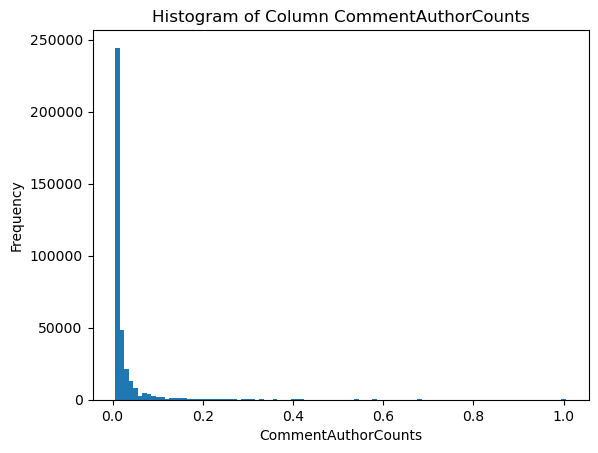

In [100]:
def histcol(df, colname):
    plt.hist(df[colname], bins=100)
    plt.title(f"Histogram of Column {colname}")
    plt.xlabel(colname)
    plt.ylabel("Frequency")
    plt.show()
    
def histlogcol(df, colname):
    plt.hist(df[colname], bins=100)
    plt.title(f"Histogram of Column {colname}")
    plt.xscale("log")
    plt.xlabel(colname)
    plt.ylabel("Frequency")
    plt.show()

histcol(df, "CommentAuthorCounts")

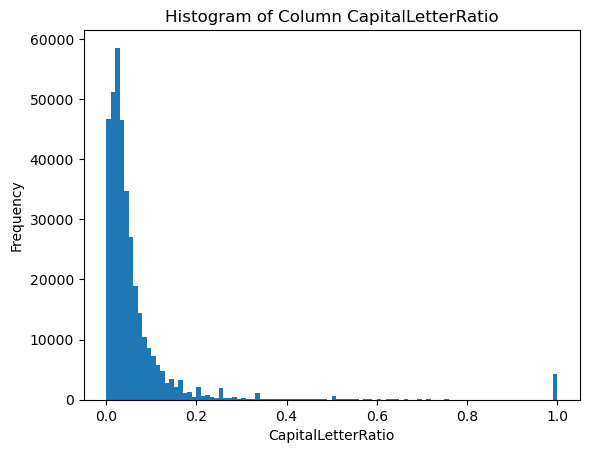

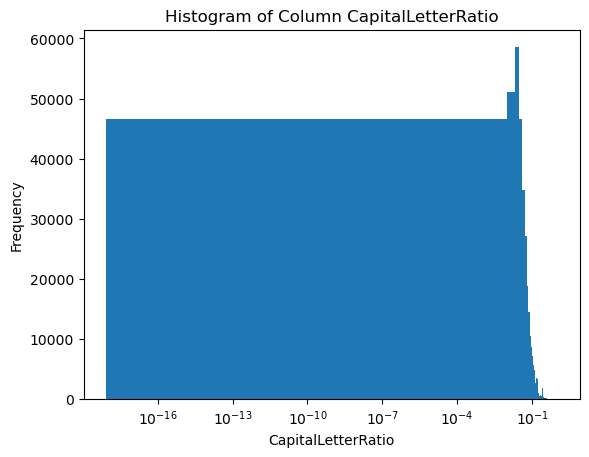

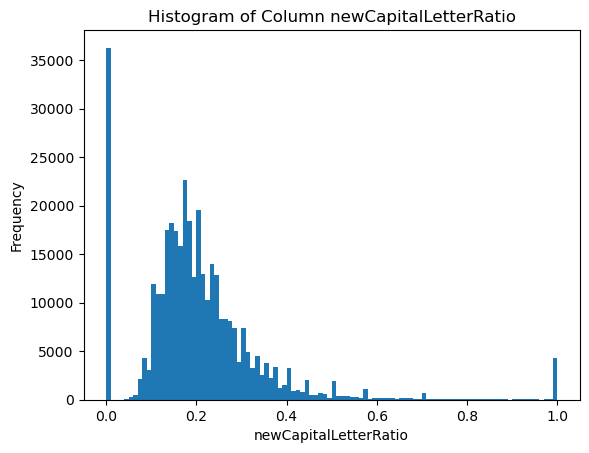

In [101]:
histcol(df, "CapitalLetterRatio")
histlogcol(df, "CapitalLetterRatio")
histcol(df, "newCapitalLetterRatio")

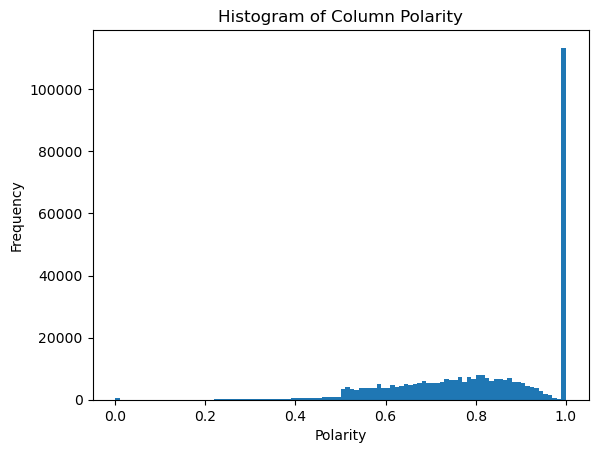

In [3]:
histcol(df, "Polarity")

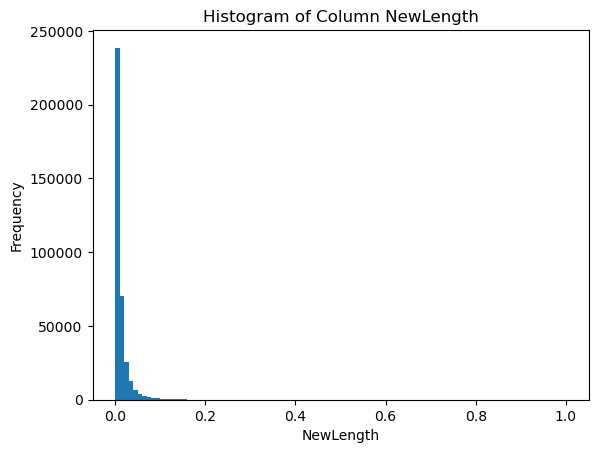

In [4]:
histcol(df, "NewLength")

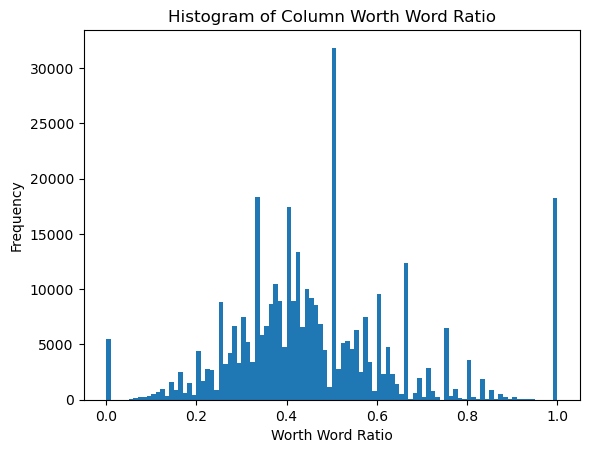

In [5]:
histcol(df, "Worth Word Ratio")

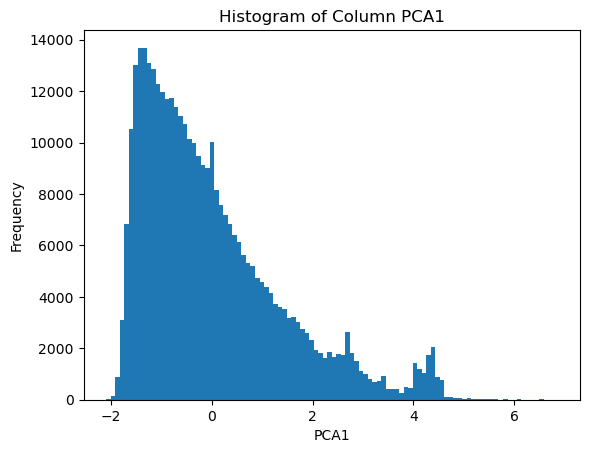

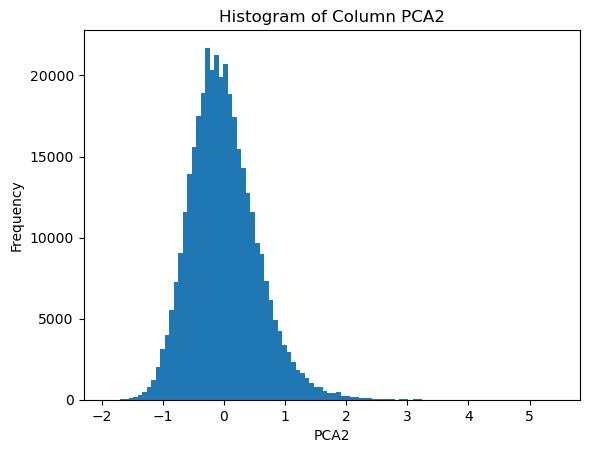

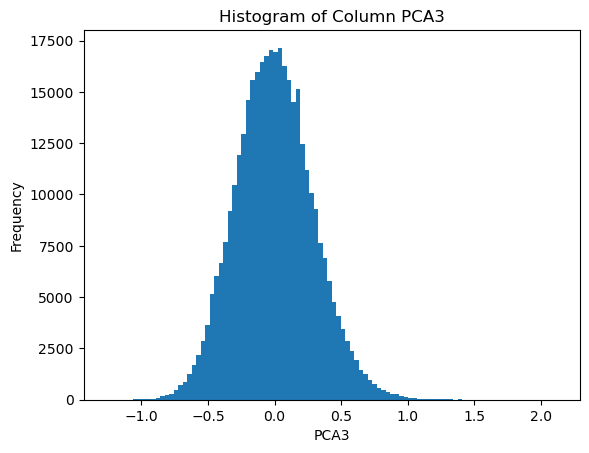

In [97]:
histcol(df, "PCA1")
histcol(df, "PCA2")
histcol(df, "PCA3")

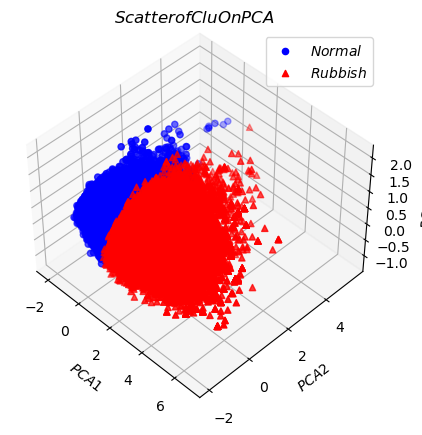

In [105]:
# 绘制PCA散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("$Scatter\tof\tCluOnPCA$")

ax.scatter(df[(df["CluOnPCAnew"]==1)]["PCA1"], df[(df["CluOnPCAnew"]==1)]["PCA2"], 
           df[(df["CluOnPCAnew"]==1)]["PCA3"], c='b', marker='o', label='$Normal$')
ax.scatter(df[(df["CluOnPCAnew"]==2)]["PCA1"], df[(df["CluOnPCAnew"]==2)]["PCA2"], 
           df[(df["CluOnPCAnew"]==2)]["PCA3"], c='r', marker='^', label='$Rubbish$')
ax.set_xlabel("$PCA1$")
ax.set_ylabel("$PCA2$")
ax.set_zlabel("$PCA3$")
ax.legend()

ax.view_init(elev=45, azim=-45)  # 初始视角为仰角20度，方位角-90度（即二维平面视图）

plt.show()

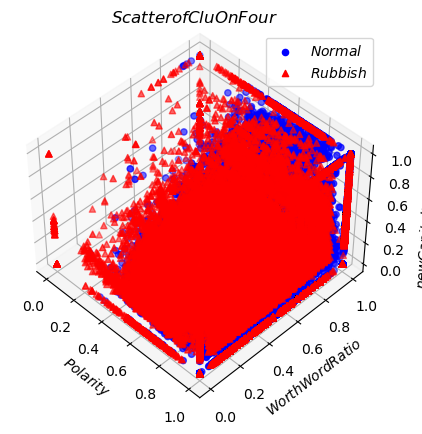

In [113]:
# 绘制cluon5散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("$Scatter\tof\tCluOnFour$")

ax.scatter(df[(df["CluOnFour"]==1)]["Polarity"], df[(df["CluOnFour"]==1)]["Worth Word Ratio"], 
           df[(df["CluOnFour"]==1)]["newCapitalLetterRatio"], c='b', marker='o', label='$Normal$')
ax.scatter(df[(df["CluOnFour"]==2)]["Polarity"], df[(df["CluOnFour"]==2)]["Worth Word Ratio"], 
           df[(df["CluOnFour"]==2)]["newCapitalLetterRatio"], c='r', marker='^', label='$Rubbish$')
ax.set_xlabel("$Polarity$")
ax.set_ylabel("$WorthWordRatio$")
ax.set_zlabel("$newCapitalLetterRatio$")
ax.legend()

ax.view_init(elev=45, azim=-45)  # 初始视角为仰角20度，方位角-90度（即二维平面视图）

plt.show()

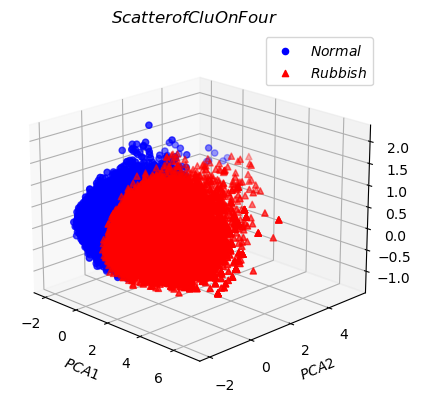

In [111]:
# 绘制CluOnFour散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("$Scatter\tof\tCluOnFour$")

ax.scatter(df[(df["CluOnFour"]==1)]["PCA1"], df[(df["CluOnFour"]==1)]["PCA2"], 
           df[(df["CluOnFour"]==1)]["PCA3"], c='b', marker='o', label='$Normal$')
ax.scatter(df[(df["CluOnFour"]==2)]["PCA1"], df[(df["CluOnFour"]==2)]["PCA2"], 
           df[(df["CluOnFour"]==2)]["PCA3"], c='r', marker='^', label='$Rubbish$')
ax.set_xlabel("$PCA1$")
ax.set_ylabel("$PCA2$")
ax.set_zlabel("$PCA3$")
ax.legend()

ax.view_init(elev=20, azim=-45)  # 初始视角为仰角20度，方位角-90度（即二维平面视图）

plt.show()

In [52]:
# 轮廓系数
from sklearn.metrics import silhouette_score

# data为聚类数据矩阵，labels为聚类结果标签
score = silhouette_score(df.loc[:,["PCA1", "PCA2", "PCA3"]], df["CluOnPCAnew"], metric='euclidean')
print("轮廓系数为： ", score)

轮廓系数为：  0.5272903088428943
